In [18]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Function to fetch stock data from Yahoo Finance
def fetch_stock_data(ticker, start_date, end_date):
    """
    Fetches historical stock data from Yahoo Finance.

    Parameters:
    ticker (str): Stock ticker symbol (e.g., 'AAPL')
    start_date (str): Start date for the stock data in 'YYYY-MM-DD' format
    end_date (str): End date for the stock data in 'YYYY-MM-DD' format

    Returns:
    DataFrame: Historical stock data with columns like Open, High, Low, Close, Volume
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Load dataset for Apple stock (AAPL)
df = fetch_stock_data('AAPL', '2015-01-01', '2023-01-01')

# Display the first few rows of the dataset
df.head()

# Preprocess the data (Drop missing values)
df = df.dropna()

# Feature Selection (Using Open, High, Low, Volume as features and Close as target)
X = df[['Open', 'High', 'Low', 'Volume']].values  # Convert to numpy array
y = df['Close'].values  # Convert to numpy array

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Add a column of ones to X_scaled to account for the intercept (bias term)
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Split data into training and testing sets (80% for training, 20% for testing)
split_idx = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# ---- Linear Regression Implementation using Gradient Descent ----

def linear_regression(X, y, learning_rate=0.0001, iterations=10000):
    """
    Linear regression using Gradient Descent with smaller learning rate and normalization.

    Parameters:
    X (numpy array): The input feature matrix (normalized with intercept term)
    y (numpy array): The target variable
    learning_rate (float): The learning rate for Gradient Descent (default is 0.001)
    iterations (int): The number of iterations for Gradient Descent (default is 1000)

    Returns:
    theta (numpy array): The model parameters (weights)
    cost_history (list): History of the cost function value at each iteration
    """
    m = len(y)  # Number of training examples
    theta = np.zeros(X.shape[1])  # Initialize model parameters (weights)
    cost_history = []  # To store the cost function values at each iteration

    # Gradient Descent loop
    for _ in range(iterations):
        # Make predictions
        y_pred = X.dot(theta)

        # Compute the error (residuals)
        error = y_pred - y

        # Compute the gradient
        gradient = (1/m) * X.T.dot(error)

        # Update the model parameters (with smaller learning rate)
        theta -= learning_rate * gradient

        # Calculate the cost (Mean Squared Error) and append to cost_history
        cost = (1/(2*m)) * np.sum(error ** 2)
        cost_history.append(cost)

    return theta, cost_history

# ---- End of Linear Regression Implementation ----

[*********************100%***********************]  1 of 1 completed


In [19]:
# Train the model using Gradient Descent
theta, cost_history = linear_regression(X_train, y_train, learning_rate=0.001, iterations=1000)

# Make predictions on the test set
y_pred = X_test.dot(theta)

# ---- Model Evaluation ----

# Function to calculate Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to calculate R-squared
def r2_score(y_true, y_pred):
    total_variance = np.var(y_true)
    unexplained_variance = np.var(y_true - y_pred)
    return 1 - (unexplained_variance / total_variance)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

Mean Squared Error: 8949.615846816223
R-Squared: 0.3781458680516476


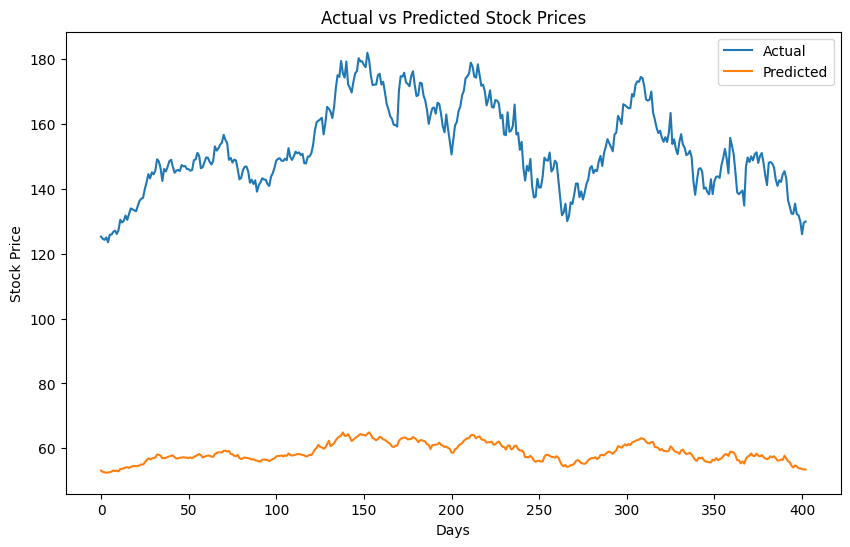

In [15]:
# ---- Visualization ----

# Plot actual vs predicted stock prices
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

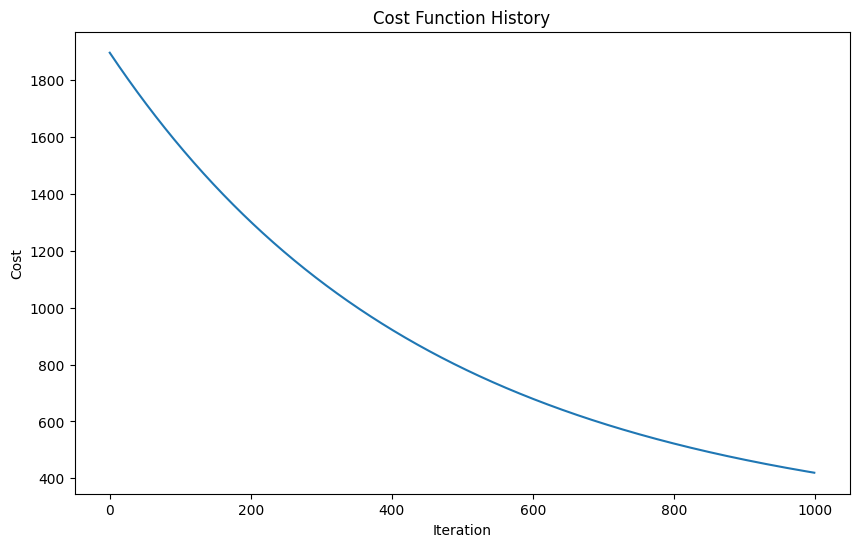

In [16]:
# Plot the cost history to show the convergence of Gradient Descent
plt.figure(figsize=(10,6))
plt.plot(range(len(cost_history)), cost_history)
plt.title('Cost Function History')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

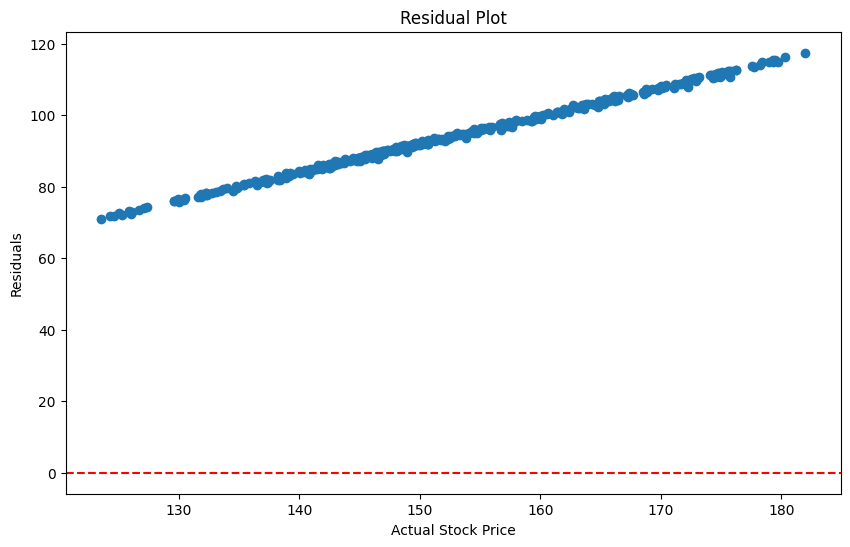

In [17]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Stock Price')
plt.ylabel('Residuals')
plt.show()